In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

# Methodological replication of the "Brain-wide functional connectivity patterns support general cognitive ability and mediate effects of socioeconomic status in youth"
https://pmc.ncbi.nlm.nih.gov/articles/PMC8575890/

Can not find this exact release data version, so the full replication of the study is not possible. We can move on to the methodological replication. We will test the generalizability of the method across data versions and cohorts.
The original study used ABCD Release 2.0.1. Our analysis uses most recent release due to availability. Notable differences between these releases include initial number of subjects and the number of cohorts. Therefore, a direct replication is not possible.

## Question 1:
When we apply the authors' exact method to a different iteration of the ABCD dataset, do we get a similar result?

### Data Source and Sample:

* Original Paper's Data: ABCD Release 2.0.1
* New Sample Size: 13274 (total number of observations), 11535 (with g_score), 7674 (baseline cohort), 5600 (followup cohort)

In [3]:
# Define paths
version_B_dir = Path("data/processed/version_B")

# Load features
features_B_baseline = pd.read_csv(version_B_dir / "features_baseline.csv")
features_B_followup = pd.read_csv(version_B_dir / "features_followup.csv")

# Load connectomes
conn_B_baseline = np.load(version_B_dir / "connectomes_baseline.npy")
conn_B_followup = np.load(version_B_dir / "connectomes_followup.npy")

# Load subjects (separate for baseline/followup)
subs_B_baseline = pd.read_csv(version_B_dir / "subjects_baseline.csv")["Subject"].tolist()
subs_B_followup = pd.read_csv(version_B_dir / "subjects_followup.csv")["Subject"].tolist()

print("Version B")
print("Baseline features:", features_B_baseline.shape)
print("Followup features:", features_B_followup.shape)
print("Baseline connectomes:", conn_B_baseline.shape)
print("Followup connectomes:", conn_B_followup.shape)
print("Baseline subjects:", len(subs_B_baseline))
print("Followup subjects:", len(subs_B_followup))


Version B
Baseline features: (4321, 13)
Followup features: (2756, 13)
Baseline connectomes: (4321, 87153)
Followup connectomes: (2756, 87153)
Baseline subjects: 4321
Followup subjects: 2756


#### Demographic characteristics of subjects included in neuroimaging analysis (baseline cohort):
* Age (mean (s.d.))       $~~~~~~~~~     9.98~(0.62)$
* Female (%) $~~~~~~~~~~~~~~~~~~ 2217~(51.3)$
* Race ethnicity (%):
* White $~~~~~~~~~~~~~~~~~~~~~~~~~~ 3071~(71.1)$
* Black $~~~~~~~~~~~~~~~~~~~~~~~~~~~ 529~(12.2)$
* Asian $~~~~~~~~~~~~~~~~~~~~~~~~~~~ 90~(2.1)$
* Other/Mixed $~~~~~~~~~~~~~~~~~ 631~(14.6)$
* Hispanic (%):
* No $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 3591~(83.1)$
* Yes $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 730~(16.9)$
* Household income(%):
* $< 50k ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 1158 ~(26.8)$
* $ \geq 50k < 100k ~~~~~~~~~~~~~~~ 1244 ~(28.8)$
* $ \geq 100k ~~~~~~~~~~~~~~~~~~~~~~~~~~ 1919 ~(44.4)$

#### Demographic characteristics of subjects included in neuroimaging analysis (followup cohort):
* Age (mean (s.d.))       $~~~~~~~~~     11.92~(0.65)$
* Female (%) $~~~~~~~~~~~~~~~~~~ 1357~(49.2)$
* Race ethnicity (%):
* White $~~~~~~~~~~~~~~~~~~~~~~~~~~ 1923~(69.78)$
* Black $~~~~~~~~~~~~~~~~~~~~~~~~~~~ 310~(11.25)$
* Asian $~~~~~~~~~~~~~~~~~~~~~~~~~~~ 63~(2.29)$
* Other/Mixed $~~~~~~~~~~~~~~~~~ 460~(16.7)$
* Hispanic (%):
* No $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 2234~(81.1)$
* Yes $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 522~(18.9)$
* Household income(%):
* $< 50k ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 696 ~(25.2)$
* $ \geq 50k < 100k ~~~~~~~~~~~~~~~ 790 ~(28.7)$
* $ \geq 100k ~~~~~~~~~~~~~~~~~~~~~~~~~~ 1270 ~(46.1)$

In [3]:
features_B_baseline.head()

,g_lavaan,site_id_l,age,Subject,meanFD,race.4level,hisp,sex,EdYearsHighest,IncCombinedMidpoint,Income2Needs,Married,income_group
0,0.546203,site06,131.0,NDARINV003RTV85,0.229358,White,No,2.0,12.0,87500.0,2.299002,Currently Married,medium
1,-0.549130,site03,109.0,NDARINV00LH735Y,0.201762,White,Yes,1.0,12.0,42500.0,1.259632,Currently Married,low
2,-0.631114,site17,118.0,NDARINV00NPMHND,0.173233,White,No,2.0,16.0,87500.0,3.556911,Currently Married,medium
3,-1.098507,site04,130.0,NDARINV00U4FTRU,0.264265,Other/Mixed,No,2.0,12.0,42500.0,1.116658,Not Currently Married,low
4,0.433796,site16,129.0,NDARINV01NAYMZH,0.171448,White,No,1.0,16.0,150000.0,2.584425,Currently Married,high


### Prepare features we want to include in a model without network information

In [4]:
from src.features.extraction import extract_article_features, extract_ses_features, combine_data

In [5]:
X_baseline_B, y_baseline_B = extract_article_features(features_B_baseline)
X_followup_B, y_followup_B = extract_article_features(features_B_followup)

print(X_baseline_B.shape, y_baseline_B.shape)
print(X_followup_B.shape, y_followup_B.shape)


(4321, 9) (4321,)
(2756, 9) (2756,)


In [6]:
# Convert NumPy array to DataFrame with placeholder column names
conn_B_baseline_df = pd.DataFrame(
    conn_B_baseline,
    columns=[f"conn_{i}" for i in range(conn_B_baseline.shape[1])]
)

# Add Subject column
conn_B_baseline_df.insert(0, "Subject", subs_B_baseline)

In [7]:
conn_B_followup_df = pd.DataFrame(
    conn_B_followup,
    columns=[f"conn_{i}" for i in range(conn_B_followup.shape[1])]
)

# Add Subject column
conn_B_followup_df.insert(0, "Subject", subs_B_followup)

In [8]:
from src.evaluation.cross_validation import run_cross_validation, print_cross_val_results

In [10]:
results_no_network, models_no_network = run_cross_validation(X_baseline_B, y_baseline_B, use_network=False)

Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 271.95it/s]


Site: site02 | Pearson r = 0.401 (p=0.000) | Partial η² = 0.097

Site: site03 | Pearson r = 0.345 (p=0.000) | Partial η² = 0.068

Site: site04 | Pearson r = 0.337 (p=0.000) | Partial η² = 0.100

Site: site05 | Pearson r = 0.498 (p=0.000) | Partial η² = 0.237

Site: site06 | Pearson r = 0.317 (p=0.000) | Partial η² = 0.051

Site: site07 | Pearson r = 0.443 (p=0.000) | Partial η² = 0.188

Site: site08 | Pearson r = 0.314 (p=0.000) | Partial η² = -0.351

Site: site09 | Pearson r = 0.439 (p=0.000) | Partial η² = -0.024

Site: site10 | Pearson r = 0.393 (p=0.000) | Partial η² = 0.151

Site: site11 | Pearson r = 0.483 (p=0.000) | Partial η² = 0.164

Site: site12 | Pearson r = 0.258 (p=0.024) | Partial η² = -0.118

Site: site13 | Pearson r = 0.414 (p=0.000) | Partial η² = 0.168

Site: site14 | Pearson r = 0.398 (p=0.000) | Partial η² = 0.151

Site: site15 | Pearson r = 0.507 (p=0.000) | Partial η² = 0.166

Site: site16 | Pearson r = 0.441 (p=0.000) | Partial η² = 0.194

Site: site17 | Pearso

In [11]:
print_cross_val_results(results_no_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.404
Partial eta squared: 0.092
R²: 0.092


In [12]:
results_network, models_network = run_cross_validation(X_baseline_B, y_baseline_B, use_network=True, X_network=conn_B_baseline_df, num_pc=100)

Cross-validation progress:   5%|▌         | 1/20 [00:49<15:32, 49.09s/it]


Site: site02 | Pearson r = 0.410 (p=0.000) | Partial η² = 0.126


Cross-validation progress:  10%|█         | 2/20 [01:32<13:40, 45.60s/it]


Site: site03 | Pearson r = 0.465 (p=0.000) | Partial η² = 0.211


Cross-validation progress:  15%|█▌        | 3/20 [02:11<12:03, 42.58s/it]


Site: site04 | Pearson r = 0.418 (p=0.000) | Partial η² = 0.161


Cross-validation progress:  20%|██        | 4/20 [02:45<10:31, 39.47s/it]


Site: site05 | Pearson r = 0.550 (p=0.000) | Partial η² = 0.298


Cross-validation progress:  25%|██▌       | 5/20 [03:17<09:08, 36.54s/it]


Site: site06 | Pearson r = 0.419 (p=0.000) | Partial η² = 0.168


Cross-validation progress:  30%|███       | 6/20 [03:44<07:45, 33.24s/it]


Site: site07 | Pearson r = 0.564 (p=0.000) | Partial η² = 0.306


Cross-validation progress:  35%|███▌      | 7/20 [04:09<06:37, 30.56s/it]


Site: site08 | Pearson r = 0.398 (p=0.000) | Partial η² = -0.049


Cross-validation progress:  40%|████      | 8/20 [04:34<05:46, 28.87s/it]


Site: site09 | Pearson r = 0.539 (p=0.000) | Partial η² = 0.183


Cross-validation progress:  45%|████▌     | 9/20 [04:58<04:59, 27.23s/it]


Site: site10 | Pearson r = 0.398 (p=0.000) | Partial η² = 0.144


Cross-validation progress:  50%|█████     | 10/20 [05:21<04:19, 25.92s/it]


Site: site11 | Pearson r = 0.535 (p=0.000) | Partial η² = 0.259


Cross-validation progress:  55%|█████▌    | 11/20 [05:43<03:44, 24.94s/it]


Site: site12 | Pearson r = 0.372 (p=0.001) | Partial η² = -0.044


Cross-validation progress:  60%|██████    | 12/20 [06:08<03:19, 24.89s/it]


Site: site13 | Pearson r = 0.482 (p=0.000) | Partial η² = 0.230


Cross-validation progress:  65%|██████▌   | 13/20 [06:33<02:54, 24.99s/it]


Site: site14 | Pearson r = 0.522 (p=0.000) | Partial η² = 0.272


Cross-validation progress:  70%|███████   | 14/20 [06:59<02:32, 25.37s/it]


Site: site15 | Pearson r = 0.595 (p=0.000) | Partial η² = 0.327


Cross-validation progress:  75%|███████▌  | 15/20 [07:22<02:02, 24.56s/it]


Site: site16 | Pearson r = 0.500 (p=0.000) | Partial η² = 0.247


Cross-validation progress:  80%|████████  | 16/20 [07:45<01:35, 23.99s/it]


Site: site17 | Pearson r = 0.332 (p=0.000) | Partial η² = -0.007


Cross-validation progress:  85%|████████▌ | 17/20 [08:09<01:11, 23.96s/it]


Site: site18 | Pearson r = 0.366 (p=0.000) | Partial η² = 0.107


Cross-validation progress:  90%|█████████ | 18/20 [08:31<00:47, 23.60s/it]


Site: site19 | Pearson r = 0.513 (p=0.000) | Partial η² = 0.242


Cross-validation progress:  95%|█████████▌| 19/20 [08:55<00:23, 23.66s/it]


Site: site20 | Pearson r = 0.534 (p=0.000) | Partial η² = 0.229


Cross-validation progress: 100%|██████████| 20/20 [09:20<00:00, 28.04s/it]


Site: site21 | Pearson r = 0.554 (p=0.000) | Partial η² = 0.290


In [13]:
print_cross_val_results(results_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.473
Partial eta squared: 0.185
R²: 0.185


In [ ]:
results_no_network, models_no_network = run_cross_validation(X_followup_B, y_followup_B, use_network=False)
print_cross_val_results(results_no_network)

In [ ]:
results_network, models_network = run_cross_validation(X_followup_B, y_followup_B, use_network=True, X_network=conn_B_followup_df, num_pc=100)

In [ ]:
print_cross_val_results(results_network)

### Summary table:
| Description                    | Pearson's correlation | Partial $\eta^2$ | Coefficient of Determination |
|--------------------------------|-----------------------|------------------|------------------------------|
| Baseline: Basic features + PCs | 0.473                 | 0.185            | 0.185                        |
| Baseline: Basic features  only | 0.404                 | 0.092            | 0.092                        |
| Followup: Basic features + PCs | 0.457                 | 0.152            | 0.152                        |
| Followup: Basic features only  | 0.325                 | 0.024            | 0.024                        |





The original finding is robust. We worked with the different data but results on the baseline data are almost identical tho the article claim. For the followup data results are not so good, but still we observe an impovement when comparing to observations only model.  Thus, he brain-cognition relationship captured by the model generalizes across similar cohorts.

## Answer 1:
Yes, we do get the similar results for the baseline cohort. Moreover, results for followup data also show significant improvement when adding PCs to observations only model.

## Question 2: What is the effect of SES features?

In [9]:
ses_baseline_B = extract_ses_features(features_B_baseline)
ses_followup_B = extract_ses_features(features_B_followup)

In [10]:
main_baseline_B =combine_data(ses_baseline_B, X_baseline_B)
main_followup_B = combine_data(ses_followup_B, X_followup_B)

Dropping duplicate columns: ['site_id_l', 'Subject']
Dropping duplicate columns: ['site_id_l', 'Subject']


In [27]:
results_no_network, models_no_network = run_cross_validation(main_baseline_B, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 350.83it/s]


Site: site02 | Pearson r = 0.460 (p=0.000) | Partial η² = 0.102

Site: site03 | Pearson r = 0.423 (p=0.000) | Partial η² = 0.150

Site: site04 | Pearson r = 0.501 (p=0.000) | Partial η² = 0.250

Site: site05 | Pearson r = 0.584 (p=0.000) | Partial η² = 0.337

Site: site06 | Pearson r = 0.458 (p=0.000) | Partial η² = 0.194

Site: site07 | Pearson r = 0.650 (p=0.000) | Partial η² = 0.393

Site: site08 | Pearson r = 0.470 (p=0.000) | Partial η² = 0.080

Site: site09 | Pearson r = 0.449 (p=0.000) | Partial η² = 0.091

Site: site10 | Pearson r = 0.461 (p=0.000) | Partial η² = 0.206

Site: site11 | Pearson r = 0.575 (p=0.000) | Partial η² = 0.300

Site: site12 | Pearson r = 0.415 (p=0.000) | Partial η² = 0.100

Site: site13 | Pearson r = 0.567 (p=0.000) | Partial η² = 0.316

Site: site14 | Pearson r = 0.489 (p=0.000) | Partial η² = 0.234

Site: site15 | Pearson r = 0.625 (p=0.000) | Partial η² = 0.378

Site: site16 | Pearson r = 0.509 (p=0.000) | Partial η² = 0.253

Site: site17 | Pearson r

In [28]:
results_network, models_network = run_cross_validation(main_baseline_B, y_baseline_B, use_network=True,
                                                       X_network=conn_B_baseline_df, num_pc=100)
print_cross_val_results(results_network)

Cross-validation progress:   5%|▌         | 1/20 [00:39<12:33, 39.64s/it]


Site: site02 | Pearson r = 0.462 (p=0.000) | Partial η² = 0.156


Cross-validation progress:  10%|█         | 2/20 [01:04<09:18, 31.01s/it]


Site: site03 | Pearson r = 0.490 (p=0.000) | Partial η² = 0.233


Cross-validation progress:  15%|█▌        | 3/20 [01:25<07:31, 26.57s/it]


Site: site04 | Pearson r = 0.529 (p=0.000) | Partial η² = 0.277


Cross-validation progress:  20%|██        | 4/20 [01:46<06:28, 24.26s/it]


Site: site05 | Pearson r = 0.605 (p=0.000) | Partial η² = 0.364


Cross-validation progress:  25%|██▌       | 5/20 [02:07<05:44, 22.94s/it]


Site: site06 | Pearson r = 0.496 (p=0.000) | Partial η² = 0.244


Cross-validation progress:  30%|███       | 6/20 [02:28<05:13, 22.40s/it]


Site: site07 | Pearson r = 0.676 (p=0.000) | Partial η² = 0.435


Cross-validation progress:  35%|███▌      | 7/20 [02:49<04:44, 21.88s/it]


Site: site08 | Pearson r = 0.498 (p=0.000) | Partial η² = 0.166


Cross-validation progress:  40%|████      | 8/20 [03:08<04:13, 21.12s/it]


Site: site09 | Pearson r = 0.523 (p=0.000) | Partial η² = 0.216


Cross-validation progress:  45%|████▌     | 9/20 [03:27<03:44, 20.39s/it]


Site: site10 | Pearson r = 0.469 (p=0.000) | Partial η² = 0.216


Cross-validation progress:  50%|█████     | 10/20 [03:46<03:18, 19.86s/it]


Site: site11 | Pearson r = 0.596 (p=0.000) | Partial η² = 0.337


Cross-validation progress:  55%|█████▌    | 11/20 [04:09<03:07, 20.81s/it]


Site: site12 | Pearson r = 0.423 (p=0.000) | Partial η² = 0.081


Cross-validation progress:  60%|██████    | 12/20 [04:32<02:52, 21.53s/it]


Site: site13 | Pearson r = 0.593 (p=0.000) | Partial η² = 0.346


Cross-validation progress:  65%|██████▌   | 13/20 [04:52<02:27, 21.00s/it]


Site: site14 | Pearson r = 0.559 (p=0.000) | Partial η² = 0.308


Cross-validation progress:  70%|███████   | 14/20 [05:15<02:10, 21.76s/it]


Site: site15 | Pearson r = 0.638 (p=0.000) | Partial η² = 0.406


Cross-validation progress:  75%|███████▌  | 15/20 [05:32<01:41, 20.34s/it]


Site: site16 | Pearson r = 0.549 (p=0.000) | Partial η² = 0.292


Cross-validation progress:  80%|████████  | 16/20 [05:53<01:21, 20.45s/it]


Site: site17 | Pearson r = 0.399 (p=0.000) | Partial η² = 0.117


Cross-validation progress:  85%|████████▌ | 17/20 [06:14<01:02, 20.74s/it]


Site: site18 | Pearson r = 0.456 (p=0.000) | Partial η² = 0.197


Cross-validation progress:  90%|█████████ | 18/20 [06:35<00:41, 20.79s/it]


Site: site19 | Pearson r = 0.573 (p=0.000) | Partial η² = 0.315


Cross-validation progress:  95%|█████████▌| 19/20 [07:03<00:22, 22.97s/it]


Site: site20 | Pearson r = 0.492 (p=0.000) | Partial η² = 0.188


Cross-validation progress: 100%|██████████| 20/20 [07:29<00:00, 22.50s/it]


Site: site21 | Pearson r = 0.577 (p=0.000) | Partial η² = 0.324
Cross-validated Performance Metrics:
Average Pearson's r: 0.530
Partial eta squared: 0.261
R²: 0.261


### Summary table 2 a:
| Description                         | Pearson's correlation | Partial $\eta^2$ | Coefficient of Determination |
|-------------------------------------|-----------------------|------------------|-----------------------------|
| Baseline: Basic features + PCs      | 0.473                 | 0.185            | 0.185                       |
| Baseline: Basic featurres only      | 0.404                 | 0.092            | 0.092                       |
| Baseline: SES only                  | 0.375                 | 0.114            | 0.114                       |
| Baseline: SES + PCs                 | 0.437                 | 0.174            | 0.174                       |
| Baseline: Basic features + SES      | 0.502                 | 0.223            | 0.223                       |
| Baseline: Basic features+ SES + PCs | 0.530                 | 0.261            | 0.261                       |



In [29]:
results_no_network, models_no_network = run_cross_validation(main_followup_B, y_followup_B, use_network=False)
print_cross_val_results(results_no_network)

Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 382.23it/s]


Site: site02 | Pearson r = 0.393 (p=0.000) | Partial η² = 0.145

Site: site03 | Pearson r = 0.357 (p=0.000) | Partial η² = 0.117

Site: site04 | Pearson r = 0.449 (p=0.000) | Partial η² = 0.160

Site: site05 | Pearson r = 0.548 (p=0.000) | Partial η² = 0.278

Site: site06 | Pearson r = 0.284 (p=0.004) | Partial η² = 0.008

Site: site07 | Pearson r = 0.557 (p=0.000) | Partial η² = 0.279

Site: site08 | Pearson r = 0.342 (p=0.002) | Partial η² = 0.012

Site: site09 | Pearson r = 0.441 (p=0.001) | Partial η² = 0.107

Site: site10 | Pearson r = 0.520 (p=0.000) | Partial η² = 0.259

Site: site11 | Pearson r = 0.547 (p=0.000) | Partial η² = 0.296

Site: site12 | Pearson r = 0.491 (p=0.000) | Partial η² = 0.240

Site: site13 | Pearson r = 0.455 (p=0.000) | Partial η² = 0.199

Site: site14 | Pearson r = 0.482 (p=0.000) | Partial η² = 0.232

Site: site15 | Pearson r = 0.735 (p=0.000) | Partial η² = 0.470

Site: site16 | Pearson r = 0.373 (p=0.000) | Partial η² = 0.132

Site: site17 | Pearson r

In [30]:
results_network, models_network = run_cross_validation(main_followup_B, y_followup_B, use_network=True,
                                                       X_network=conn_B_followup_df, num_pc=100)
print_cross_val_results(results_network)

Cross-validation progress:   5%|▌         | 1/20 [00:23<07:34, 23.91s/it]


Site: site02 | Pearson r = 0.461 (p=0.000) | Partial η² = 0.205


Cross-validation progress:  10%|█         | 2/20 [00:36<05:06, 17.03s/it]


Site: site03 | Pearson r = 0.439 (p=0.000) | Partial η² = 0.185


Cross-validation progress:  15%|█▌        | 3/20 [00:53<04:52, 17.19s/it]


Site: site04 | Pearson r = 0.503 (p=0.000) | Partial η² = 0.182


Cross-validation progress:  20%|██        | 4/20 [01:16<05:14, 19.66s/it]


Site: site05 | Pearson r = 0.622 (p=0.000) | Partial η² = 0.355


Cross-validation progress:  25%|██▌       | 5/20 [01:29<04:18, 17.24s/it]


Site: site06 | Pearson r = 0.392 (p=0.000) | Partial η² = 0.108


Cross-validation progress:  30%|███       | 6/20 [01:43<03:44, 16.04s/it]


Site: site07 | Pearson r = 0.594 (p=0.000) | Partial η² = 0.310


Cross-validation progress:  35%|███▌      | 7/20 [01:57<03:17, 15.18s/it]


Site: site08 | Pearson r = 0.474 (p=0.000) | Partial η² = 0.163


Cross-validation progress:  40%|████      | 8/20 [02:08<02:49, 14.14s/it]


Site: site09 | Pearson r = 0.536 (p=0.000) | Partial η² = 0.162


Cross-validation progress:  45%|████▌     | 9/20 [02:18<02:21, 12.86s/it]


Site: site10 | Pearson r = 0.533 (p=0.000) | Partial η² = 0.282


Cross-validation progress:  50%|█████     | 10/20 [02:31<02:06, 12.64s/it]


Site: site11 | Pearson r = 0.547 (p=0.000) | Partial η² = 0.227


Cross-validation progress:  55%|█████▌    | 11/20 [02:43<01:53, 12.59s/it]


Site: site12 | Pearson r = 0.596 (p=0.000) | Partial η² = 0.354


Cross-validation progress:  60%|██████    | 12/20 [02:53<01:35, 11.90s/it]


Site: site13 | Pearson r = 0.504 (p=0.000) | Partial η² = 0.244


Cross-validation progress:  65%|██████▌   | 13/20 [03:04<01:19, 11.40s/it]


Site: site14 | Pearson r = 0.564 (p=0.000) | Partial η² = 0.317


Cross-validation progress:  70%|███████   | 14/20 [03:16<01:10, 11.76s/it]


Site: site15 | Pearson r = 0.736 (p=0.000) | Partial η² = 0.502


Cross-validation progress:  75%|███████▌  | 15/20 [03:26<00:56, 11.21s/it]


Site: site16 | Pearson r = 0.443 (p=0.000) | Partial η² = 0.180


Cross-validation progress:  80%|████████  | 16/20 [03:36<00:43, 10.82s/it]


Site: site17 | Pearson r = 0.454 (p=0.000) | Partial η² = 0.073


Cross-validation progress:  85%|████████▌ | 17/20 [03:49<00:34, 11.43s/it]


Site: site18 | Pearson r = 0.381 (p=0.000) | Partial η² = 0.128


Cross-validation progress:  90%|█████████ | 18/20 [04:02<00:23, 11.98s/it]


Site: site19 | Pearson r = 0.368 (p=0.001) | Partial η² = 0.103


Cross-validation progress:  95%|█████████▌| 19/20 [04:13<00:11, 11.57s/it]


Site: site20 | Pearson r = 0.603 (p=0.000) | Partial η² = 0.339


Cross-validation progress: 100%|██████████| 20/20 [04:25<00:00, 13.27s/it]


Site: site21 | Pearson r = 0.630 (p=0.000) | Partial η² = 0.389
Cross-validated Performance Metrics:
Average Pearson's r: 0.519
Partial eta squared: 0.241
R²: 0.241


### Summary table 2 b:
| Description                          | Pearson's correlation | Partial $\eta^2$ | Coefficient of Determination |
|--------------------------------------|-----------------------|------------------|------------------------------|
| Followup: Basic features + PCs       | 0.457                 | 0.152            | 0.152                        |
| Followup: Basic features only        | 0.325                 | 0.024            | 0.024                        |
| Followup: SES only                   | 0.405                 | 0.137            | 0.137                        |
| Followup: SES + PCs                  | 0.487                 | 0.197            | 0.197                        |
| Followup: Basic features + SES       | 0.463                 | 0.188            | 0.188                        |
| Followup: Basic features + SES + PCs | 0.519                 | 0.241            | 0.241                        |


## Answer 2:
Yes, the new features (SES) help improve the quality of the models!
We have the evidence to support this finding from both tables:

* SES alone is a better predictor than basic features alone.
* Adding SES to basic features provides a larger boost in explained variance than adding PCs does.
* The best model in both cases is the full model that includes basic features, the new SES features and the PCs.

## Question 2*: Are this results statistically significant?
One need to compare performance of nested models on each fold, not the average performance.


## Answer 2*:
The SES features significantly improve model performance on their own and provide unique information that isn't captured by PCs. Their value is consistent across both time points.

## Question 3:
Is it possible to move towards network summary statistics without loss of explained variation?

There are several questions that need to be asked. First, we need to understand whether network summary statistics increase the amount of explained variance. If yes, then which one. We need to compare the following:
* How much variance can network stats explain alone?
* Does adding network stats to the original data help?
* Do network stats provide new information that wasn't captured by the PCs?
* Can they replace PCs?

In [13]:
regions = pd.read_csv('../data/raw/gordon_sub_cere_parcels.csv')

In [15]:
from src.network.statistics import compute_one_statistic

## Strength:
* Strength metrics (avg_positive_strength, avg_negative_strength, avg_total_strength) follow
          definitions of node strength in weighted networks [Barrat et al., 2004; Rubinov & Sporns, 2010].
          Positive/negative separation follows signed-network convention [Rubinov, 2011].
* Within- and between-system means (within_positive_mean, etc.) are standard summaries of
          functional connectivity [Power et al., 2011].
* Segregation metrics:
    * segregation_ratio: within-system positive mean / between-system positive mean (used in several FC studies).
    * segregation_index: (within-system positive mean – between-system positive mean) / within-system positive mean,
              as defined by Chan et al. (2014, PNAS).This function calculates the following statistics for each network:



In [20]:
avg_pos_strength_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                          df_network=conn_B_baseline_df,
                          regions=regions,
                          stat_name="avg_positive_strength",
                          mode="all",
                          node_order=None,
                          matrix_size=418,
                          diag_value=0.0)

100%|██████████| 4321/4321 [00:35<00:00, 122.78it/s]


In [21]:
baseline_B_plus = combine_data(main_baseline_B , avg_pos_strength_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus , y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 126.89it/s]


Site: site02 | Pearson r = 0.479 (p=0.000) | Partial η² = 0.132

Site: site03 | Pearson r = 0.436 (p=0.000) | Partial η² = 0.166

Site: site04 | Pearson r = 0.497 (p=0.000) | Partial η² = 0.246

Site: site05 | Pearson r = 0.585 (p=0.000) | Partial η² = 0.339

Site: site06 | Pearson r = 0.451 (p=0.000) | Partial η² = 0.187

Site: site07 | Pearson r = 0.650 (p=0.000) | Partial η² = 0.395

Site: site08 | Pearson r = 0.472 (p=0.000) | Partial η² = 0.101

Site: site09 | Pearson r = 0.431 (p=0.000) | Partial η² = 0.069

Site: site10 | Pearson r = 0.469 (p=0.000) | Partial η² = 0.214

Site: site11 | Pearson r = 0.575 (p=0.000) | Partial η² = 0.302

Site: site12 | Pearson r = 0.422 (p=0.000) | Partial η² = 0.098

Site: site13 | Pearson r = 0.564 (p=0.000) | Partial η² = 0.307

Site: site14 | Pearson r = 0.479 (p=0.000) | Partial η² = 0.224

Site: site15 | Pearson r = 0.618 (p=0.000) | Partial η² = 0.375

Site: site16 | Pearson r = 0.520 (p=0.000) | Partial η² = 0.260

Site: site17 | Pearson r

In [22]:
avg_pos_strength_followup_B = compute_one_statistic(df_features=main_followup_B,
                          df_network=conn_B_followup_df,
                          regions=regions,
                          stat_name="avg_positive_strength",
                          mode="all",
                          node_order=None,
                          matrix_size=418,
                          diag_value=0.0)

100%|██████████| 2756/2756 [00:22<00:00, 124.65it/s]


In [24]:
followup_B_plus = combine_data(main_followup_B, avg_pos_strength_followup_B)
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B, use_network=False)
print_cross_val_results(results_no_network)

Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 279.29it/s]


Site: site02 | Pearson r = 0.400 (p=0.000) | Partial η² = 0.155

Site: site03 | Pearson r = 0.376 (p=0.000) | Partial η² = 0.132

Site: site04 | Pearson r = 0.442 (p=0.000) | Partial η² = 0.127

Site: site05 | Pearson r = 0.572 (p=0.000) | Partial η² = 0.306

Site: site06 | Pearson r = 0.294 (p=0.003) | Partial η² = 0.018

Site: site07 | Pearson r = 0.532 (p=0.000) | Partial η² = 0.256

Site: site08 | Pearson r = 0.364 (p=0.001) | Partial η² = 0.040

Site: site09 | Pearson r = 0.373 (p=0.006) | Partial η² = 0.031

Site: site10 | Pearson r = 0.521 (p=0.000) | Partial η² = 0.260

Site: site11 | Pearson r = 0.517 (p=0.000) | Partial η² = 0.212

Site: site12 | Pearson r = 0.505 (p=0.000) | Partial η² = 0.253

Site: site13 | Pearson r = 0.455 (p=0.000) | Partial η² = 0.200

Site: site14 | Pearson r = 0.484 (p=0.000) | Partial η² = 0.233

Site: site15 | Pearson r = 0.740 (p=0.000) | Partial η² = 0.489

Site: site16 | Pearson r = 0.369 (p=0.000) | Partial η² = 0.128

Site: site17 | Pearson r

In [25]:
results_network, models_network = run_cross_validation(main_baseline_B, y_baseline_B, use_network=True,
                                                       X_network=conn_B_baseline_df, num_pc=15)
print_cross_val_results(results_network)

Cross-validation progress:   5%|▌         | 1/20 [00:24<07:51, 24.81s/it]


Site: site02 | Pearson r = 0.445 (p=0.000) | Partial η² = 0.111


Cross-validation progress:  10%|█         | 2/20 [00:44<06:33, 21.85s/it]


Site: site03 | Pearson r = 0.440 (p=0.000) | Partial η² = 0.176


Cross-validation progress:  15%|█▌        | 3/20 [01:01<05:34, 19.70s/it]


Site: site04 | Pearson r = 0.500 (p=0.000) | Partial η² = 0.250


Cross-validation progress:  20%|██        | 4/20 [01:19<05:00, 18.76s/it]


Site: site05 | Pearson r = 0.584 (p=0.000) | Partial η² = 0.339


Cross-validation progress:  25%|██▌       | 5/20 [01:35<04:30, 18.02s/it]


Site: site06 | Pearson r = 0.466 (p=0.000) | Partial η² = 0.206


Cross-validation progress:  30%|███       | 6/20 [01:51<04:02, 17.29s/it]


Site: site07 | Pearson r = 0.665 (p=0.000) | Partial η² = 0.413


Cross-validation progress:  35%|███▌      | 7/20 [02:07<03:40, 16.99s/it]


Site: site08 | Pearson r = 0.500 (p=0.000) | Partial η² = 0.149


Cross-validation progress:  40%|████      | 8/20 [02:24<03:21, 16.79s/it]


Site: site09 | Pearson r = 0.468 (p=0.000) | Partial η² = 0.140


Cross-validation progress:  45%|████▌     | 9/20 [02:37<02:51, 15.59s/it]


Site: site10 | Pearson r = 0.459 (p=0.000) | Partial η² = 0.207


Cross-validation progress:  50%|█████     | 10/20 [02:50<02:29, 14.92s/it]


Site: site11 | Pearson r = 0.577 (p=0.000) | Partial η² = 0.310


Cross-validation progress:  55%|█████▌    | 11/20 [03:03<02:09, 14.34s/it]


Site: site12 | Pearson r = 0.402 (p=0.000) | Partial η² = 0.068


Cross-validation progress:  60%|██████    | 12/20 [03:13<01:44, 13.00s/it]


Site: site13 | Pearson r = 0.576 (p=0.000) | Partial η² = 0.322


Cross-validation progress:  65%|██████▌   | 13/20 [03:26<01:30, 12.94s/it]


Site: site14 | Pearson r = 0.540 (p=0.000) | Partial η² = 0.286


Cross-validation progress:  70%|███████   | 14/20 [03:39<01:18, 13.01s/it]


Site: site15 | Pearson r = 0.621 (p=0.000) | Partial η² = 0.384


Cross-validation progress:  75%|███████▌  | 15/20 [03:49<00:59, 11.92s/it]


Site: site16 | Pearson r = 0.530 (p=0.000) | Partial η² = 0.272


Cross-validation progress:  80%|████████  | 16/20 [04:02<00:49, 12.28s/it]


Site: site17 | Pearson r = 0.381 (p=0.000) | Partial η² = 0.116


Cross-validation progress:  85%|████████▌ | 17/20 [04:15<00:37, 12.63s/it]


Site: site18 | Pearson r = 0.439 (p=0.000) | Partial η² = 0.177


Cross-validation progress:  90%|█████████ | 18/20 [04:28<00:25, 12.74s/it]


Site: site19 | Pearson r = 0.594 (p=0.000) | Partial η² = 0.335


Cross-validation progress:  95%|█████████▌| 19/20 [04:41<00:12, 12.65s/it]


Site: site20 | Pearson r = 0.486 (p=0.000) | Partial η² = 0.180


Cross-validation progress: 100%|██████████| 20/20 [04:53<00:00, 14.66s/it]


Site: site21 | Pearson r = 0.562 (p=0.000) | Partial η² = 0.303
Cross-validated Performance Metrics:
Average Pearson's r: 0.512
Partial eta squared: 0.237
R²: 0.237


In [26]:
results_network, models_network = run_cross_validation(main_followup_B, y_followup_B, use_network=True,
                                                       X_network=conn_B_followup_df, num_pc=15)
print_cross_val_results(results_network)

Cross-validation progress:   5%|▌         | 1/20 [00:16<05:22, 16.99s/it]


Site: site02 | Pearson r = 0.423 (p=0.000) | Partial η² = 0.170


Cross-validation progress:  10%|█         | 2/20 [00:23<03:14, 10.82s/it]


Site: site03 | Pearson r = 0.396 (p=0.000) | Partial η² = 0.153


Cross-validation progress:  15%|█▌        | 3/20 [00:29<02:29,  8.79s/it]


Site: site04 | Pearson r = 0.459 (p=0.000) | Partial η² = 0.150


Cross-validation progress:  20%|██        | 4/20 [00:36<02:08,  8.01s/it]


Site: site05 | Pearson r = 0.574 (p=0.000) | Partial η² = 0.305


Cross-validation progress:  25%|██▌       | 5/20 [00:46<02:08,  8.56s/it]


Site: site06 | Pearson r = 0.317 (p=0.001) | Partial η² = 0.047


Cross-validation progress:  30%|███       | 6/20 [00:52<01:50,  7.90s/it]


Site: site07 | Pearson r = 0.572 (p=0.000) | Partial η² = 0.297


Cross-validation progress:  35%|███▌      | 7/20 [00:59<01:36,  7.42s/it]


Site: site08 | Pearson r = 0.380 (p=0.001) | Partial η² = 0.052


Cross-validation progress:  40%|████      | 8/20 [01:05<01:25,  7.10s/it]


Site: site09 | Pearson r = 0.402 (p=0.003) | Partial η² = 0.059


Cross-validation progress:  45%|████▌     | 9/20 [01:11<01:14,  6.76s/it]


Site: site10 | Pearson r = 0.519 (p=0.000) | Partial η² = 0.262


Cross-validation progress:  50%|█████     | 10/20 [01:18<01:06,  6.67s/it]


Site: site11 | Pearson r = 0.567 (p=0.000) | Partial η² = 0.297


Cross-validation progress:  55%|█████▌    | 11/20 [01:24<00:59,  6.60s/it]


Site: site12 | Pearson r = 0.517 (p=0.000) | Partial η² = 0.265


Cross-validation progress:  60%|██████    | 12/20 [01:31<00:52,  6.54s/it]


Site: site13 | Pearson r = 0.464 (p=0.000) | Partial η² = 0.209


Cross-validation progress:  65%|██████▌   | 13/20 [01:38<00:48,  6.97s/it]


Site: site14 | Pearson r = 0.505 (p=0.000) | Partial η² = 0.254


Cross-validation progress:  70%|███████   | 14/20 [01:45<00:41,  6.87s/it]


Site: site15 | Pearson r = 0.741 (p=0.000) | Partial η² = 0.504


Cross-validation progress:  75%|███████▌  | 15/20 [01:51<00:32,  6.56s/it]


Site: site16 | Pearson r = 0.369 (p=0.000) | Partial η² = 0.122


Cross-validation progress:  80%|████████  | 16/20 [01:59<00:28,  7.11s/it]


Site: site17 | Pearson r = 0.361 (p=0.000) | Partial η² = -0.072


Cross-validation progress:  85%|████████▌ | 17/20 [02:06<00:20,  6.94s/it]


Site: site18 | Pearson r = 0.390 (p=0.000) | Partial η² = 0.143


Cross-validation progress:  90%|█████████ | 18/20 [02:12<00:13,  6.78s/it]


Site: site19 | Pearson r = 0.338 (p=0.002) | Partial η² = 0.063


Cross-validation progress:  95%|█████████▌| 19/20 [02:18<00:06,  6.56s/it]


Site: site20 | Pearson r = 0.584 (p=0.000) | Partial η² = 0.308


Cross-validation progress: 100%|██████████| 20/20 [02:25<00:00,  7.25s/it]


Site: site21 | Pearson r = 0.592 (p=0.000) | Partial η² = 0.345
Cross-validated Performance Metrics:
Average Pearson's r: 0.473
Partial eta squared: 0.197
R²: 0.197


#### Positive strength (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.503                   | 0.224                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.460                   | 0.183                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |




In [27]:
avg_neg_strength_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="avg_negative_strength",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

100%|██████████| 4321/4321 [00:36<00:00, 118.46it/s]


In [28]:
baseline_B_plus = combine_data(main_baseline_B, avg_neg_strength_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 231.57it/s]


Site: site02 | Pearson r = 0.457 (p=0.000) | Partial η² = 0.110

Site: site03 | Pearson r = 0.427 (p=0.000) | Partial η² = 0.152

Site: site04 | Pearson r = 0.495 (p=0.000) | Partial η² = 0.245

Site: site05 | Pearson r = 0.580 (p=0.000) | Partial η² = 0.334

Site: site06 | Pearson r = 0.456 (p=0.000) | Partial η² = 0.190

Site: site07 | Pearson r = 0.643 (p=0.000) | Partial η² = 0.387

Site: site08 | Pearson r = 0.468 (p=0.000) | Partial η² = 0.086

Site: site09 | Pearson r = 0.442 (p=0.000) | Partial η² = 0.096

Site: site10 | Pearson r = 0.467 (p=0.000) | Partial η² = 0.211

Site: site11 | Pearson r = 0.574 (p=0.000) | Partial η² = 0.305

Site: site12 | Pearson r = 0.417 (p=0.000) | Partial η² = 0.095

Site: site13 | Pearson r = 0.563 (p=0.000) | Partial η² = 0.307

Site: site14 | Pearson r = 0.481 (p=0.000) | Partial η² = 0.226

Site: site15 | Pearson r = 0.625 (p=0.000) | Partial η² = 0.383

Site: site16 | Pearson r = 0.516 (p=0.000) | Partial η² = 0.257

Site: site17 | Pearson r

In [29]:
avg_neg_strength_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="avg_negative_strength",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)


100%|██████████| 2756/2756 [00:19<00:00, 138.42it/s]


In [30]:
followup_B_plus = combine_data(main_followup_B, avg_neg_strength_followup_B)
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 228.78it/s]


Site: site02 | Pearson r = 0.419 (p=0.000) | Partial η² = 0.170

Site: site03 | Pearson r = 0.371 (p=0.000) | Partial η² = 0.128

Site: site04 | Pearson r = 0.452 (p=0.000) | Partial η² = 0.155

Site: site05 | Pearson r = 0.557 (p=0.000) | Partial η² = 0.288

Site: site06 | Pearson r = 0.304 (p=0.002) | Partial η² = 0.030

Site: site07 | Pearson r = 0.557 (p=0.000) | Partial η² = 0.279

Site: site08 | Pearson r = 0.351 (p=0.002) | Partial η² = -0.000

Site: site09 | Pearson r = 0.436 (p=0.001) | Partial η² = 0.105

Site: site10 | Pearson r = 0.518 (p=0.000) | Partial η² = 0.258

Site: site11 | Pearson r = 0.544 (p=0.000) | Partial η² = 0.287

Site: site12 | Pearson r = 0.489 (p=0.000) | Partial η² = 0.237

Site: site13 | Pearson r = 0.440 (p=0.000) | Partial η² = 0.182

Site: site14 | Pearson r = 0.458 (p=0.000) | Partial η² = 0.209

Site: site15 | Pearson r = 0.735 (p=0.000) | Partial η² = 0.484

Site: site16 | Pearson r = 0.392 (p=0.000) | Partial η² = 0.145

Site: site17 | Pearson 

#### Negative strength (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.500                   | 0.222                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.464                   | 0.187                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [31]:
avg_total_strength_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="avg_total_strength",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)
baseline_B_plus = combine_data(main_baseline_B, avg_total_strength_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 4321/4321 [00:38<00:00, 113.48it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 212.39it/s]


Site: site02 | Pearson r = 0.474 (p=0.000) | Partial η² = 0.124

Site: site03 | Pearson r = 0.430 (p=0.000) | Partial η² = 0.153

Site: site04 | Pearson r = 0.502 (p=0.000) | Partial η² = 0.250

Site: site05 | Pearson r = 0.587 (p=0.000) | Partial η² = 0.341

Site: site06 | Pearson r = 0.454 (p=0.000) | Partial η² = 0.191

Site: site07 | Pearson r = 0.650 (p=0.000) | Partial η² = 0.394

Site: site08 | Pearson r = 0.472 (p=0.000) | Partial η² = 0.090

Site: site09 | Pearson r = 0.427 (p=0.000) | Partial η² = 0.071

Site: site10 | Pearson r = 0.468 (p=0.000) | Partial η² = 0.212

Site: site11 | Pearson r = 0.573 (p=0.000) | Partial η² = 0.300

Site: site12 | Pearson r = 0.431 (p=0.000) | Partial η² = 0.115

Site: site13 | Pearson r = 0.569 (p=0.000) | Partial η² = 0.317

Site: site14 | Pearson r = 0.476 (p=0.000) | Partial η² = 0.222

Site: site15 | Pearson r = 0.620 (p=0.000) | Partial η² = 0.375

Site: site16 | Pearson r = 0.518 (p=0.000) | Partial η² = 0.260

Site: site17 | Pearson r

In [32]:
avg_total_strength_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="avg_total_strength",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B, avg_total_strength_followup_B)
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:20<00:00, 134.64it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 300.52it/s]


Site: site02 | Pearson r = 0.422 (p=0.000) | Partial η² = 0.173

Site: site03 | Pearson r = 0.379 (p=0.000) | Partial η² = 0.134

Site: site04 | Pearson r = 0.449 (p=0.000) | Partial η² = 0.139

Site: site05 | Pearson r = 0.572 (p=0.000) | Partial η² = 0.308

Site: site06 | Pearson r = 0.310 (p=0.002) | Partial η² = 0.037

Site: site07 | Pearson r = 0.538 (p=0.000) | Partial η² = 0.261

Site: site08 | Pearson r = 0.363 (p=0.001) | Partial η² = 0.028

Site: site09 | Pearson r = 0.395 (p=0.003) | Partial η² = 0.064

Site: site10 | Pearson r = 0.510 (p=0.000) | Partial η² = 0.249

Site: site11 | Pearson r = 0.548 (p=0.000) | Partial η² = 0.270

Site: site12 | Pearson r = 0.496 (p=0.000) | Partial η² = 0.243

Site: site13 | Pearson r = 0.446 (p=0.000) | Partial η² = 0.191

Site: site14 | Pearson r = 0.472 (p=0.000) | Partial η² = 0.220

Site: site15 | Pearson r = 0.745 (p=0.000) | Partial η² = 0.500

Site: site16 | Pearson r = 0.378 (p=0.000) | Partial η² = 0.134

Site: site17 | Pearson r

#### Total strength (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.502                   | 0.223                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.464                   | 0.190                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [33]:
within_pos_mean_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="within_positive_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)


100%|██████████| 4321/4321 [00:37<00:00, 116.10it/s]


In [35]:
baseline_B_plus = combine_data(main_baseline_B, within_pos_mean_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 211.69it/s]


Site: site02 | Pearson r = 0.461 (p=0.000) | Partial η² = 0.082

Site: site03 | Pearson r = 0.434 (p=0.000) | Partial η² = 0.166

Site: site04 | Pearson r = 0.495 (p=0.000) | Partial η² = 0.243

Site: site05 | Pearson r = 0.581 (p=0.000) | Partial η² = 0.335

Site: site06 | Pearson r = 0.458 (p=0.000) | Partial η² = 0.195

Site: site07 | Pearson r = 0.644 (p=0.000) | Partial η² = 0.391

Site: site08 | Pearson r = 0.462 (p=0.000) | Partial η² = 0.073

Site: site09 | Pearson r = 0.442 (p=0.000) | Partial η² = 0.094

Site: site10 | Pearson r = 0.469 (p=0.000) | Partial η² = 0.215

Site: site11 | Pearson r = 0.588 (p=0.000) | Partial η² = 0.305

Site: site12 | Pearson r = 0.427 (p=0.000) | Partial η² = 0.108

Site: site13 | Pearson r = 0.553 (p=0.000) | Partial η² = 0.298

Site: site14 | Pearson r = 0.481 (p=0.000) | Partial η² = 0.226

Site: site15 | Pearson r = 0.631 (p=0.000) | Partial η² = 0.388

Site: site16 | Pearson r = 0.521 (p=0.000) | Partial η² = 0.265

Site: site17 | Pearson r

In [36]:
within_pos_mean_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="within_positive_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B,within_pos_mean_followup_B )
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:21<00:00, 128.57it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 339.80it/s]


Site: site02 | Pearson r = 0.403 (p=0.000) | Partial η² = 0.148

Site: site03 | Pearson r = 0.358 (p=0.000) | Partial η² = 0.116

Site: site04 | Pearson r = 0.436 (p=0.000) | Partial η² = 0.132

Site: site05 | Pearson r = 0.558 (p=0.000) | Partial η² = 0.287

Site: site06 | Pearson r = 0.301 (p=0.002) | Partial η² = 0.029

Site: site07 | Pearson r = 0.544 (p=0.000) | Partial η² = 0.274

Site: site08 | Pearson r = 0.354 (p=0.001) | Partial η² = 0.022

Site: site09 | Pearson r = 0.394 (p=0.003) | Partial η² = 0.064

Site: site10 | Pearson r = 0.514 (p=0.000) | Partial η² = 0.248

Site: site11 | Pearson r = 0.545 (p=0.000) | Partial η² = 0.293

Site: site12 | Pearson r = 0.512 (p=0.000) | Partial η² = 0.262

Site: site13 | Pearson r = 0.454 (p=0.000) | Partial η² = 0.196

Site: site14 | Pearson r = 0.495 (p=0.000) | Partial η² = 0.244

Site: site15 | Pearson r = 0.718 (p=0.000) | Partial η² = 0.452

Site: site16 | Pearson r = 0.349 (p=0.000) | Partial η² = 0.110

Site: site17 | Pearson r

#### Within positive connectivity (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.503                   | 0.221                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.462                   | 0.184                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [37]:
between_pos_mean_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="between_positive_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)
baseline_B_plus = combine_data(main_baseline_B, between_pos_mean_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 4321/4321 [00:36<00:00, 118.50it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 206.71it/s]


Site: site02 | Pearson r = 0.478 (p=0.000) | Partial η² = 0.137

Site: site03 | Pearson r = 0.437 (p=0.000) | Partial η² = 0.166

Site: site04 | Pearson r = 0.497 (p=0.000) | Partial η² = 0.247

Site: site05 | Pearson r = 0.582 (p=0.000) | Partial η² = 0.335

Site: site06 | Pearson r = 0.459 (p=0.000) | Partial η² = 0.194

Site: site07 | Pearson r = 0.648 (p=0.000) | Partial η² = 0.392

Site: site08 | Pearson r = 0.475 (p=0.000) | Partial η² = 0.108

Site: site09 | Pearson r = 0.428 (p=0.000) | Partial η² = 0.060

Site: site10 | Pearson r = 0.467 (p=0.000) | Partial η² = 0.212

Site: site11 | Pearson r = 0.573 (p=0.000) | Partial η² = 0.303

Site: site12 | Pearson r = 0.427 (p=0.000) | Partial η² = 0.102

Site: site13 | Pearson r = 0.563 (p=0.000) | Partial η² = 0.303

Site: site14 | Pearson r = 0.481 (p=0.000) | Partial η² = 0.224

Site: site15 | Pearson r = 0.618 (p=0.000) | Partial η² = 0.375

Site: site16 | Pearson r = 0.520 (p=0.000) | Partial η² = 0.260

Site: site17 | Pearson r

In [38]:
between_pos_mean_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="between_positive_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B,between_pos_mean_followup_B )
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:21<00:00, 127.42it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 253.31it/s]


Site: site02 | Pearson r = 0.403 (p=0.000) | Partial η² = 0.158

Site: site03 | Pearson r = 0.380 (p=0.000) | Partial η² = 0.136

Site: site04 | Pearson r = 0.449 (p=0.000) | Partial η² = 0.133

Site: site05 | Pearson r = 0.574 (p=0.000) | Partial η² = 0.309

Site: site06 | Pearson r = 0.295 (p=0.003) | Partial η² = 0.021

Site: site07 | Pearson r = 0.537 (p=0.000) | Partial η² = 0.256

Site: site08 | Pearson r = 0.369 (p=0.001) | Partial η² = 0.045

Site: site09 | Pearson r = 0.380 (p=0.005) | Partial η² = 0.035

Site: site10 | Pearson r = 0.516 (p=0.000) | Partial η² = 0.257

Site: site11 | Pearson r = 0.509 (p=0.000) | Partial η² = 0.186

Site: site12 | Pearson r = 0.505 (p=0.000) | Partial η² = 0.253

Site: site13 | Pearson r = 0.457 (p=0.000) | Partial η² = 0.203

Site: site14 | Pearson r = 0.474 (p=0.000) | Partial η² = 0.223

Site: site15 | Pearson r = 0.736 (p=0.000) | Partial η² = 0.493

Site: site16 | Pearson r = 0.383 (p=0.000) | Partial η² = 0.140

Site: site17 | Pearson r

#### Between positive connectivity (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.503                   | 0.224                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.461                   | 0.184                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [40]:
within_neg_mean_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="within_negative_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)
baseline_B_plus = combine_data(main_baseline_B, within_neg_mean_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 4321/4321 [00:37<00:00, 116.19it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 202.54it/s]


Site: site02 | Pearson r = 0.451 (p=0.000) | Partial η² = 0.087

Site: site03 | Pearson r = 0.431 (p=0.000) | Partial η² = 0.156

Site: site04 | Pearson r = 0.498 (p=0.000) | Partial η² = 0.246

Site: site05 | Pearson r = 0.576 (p=0.000) | Partial η² = 0.328

Site: site06 | Pearson r = 0.440 (p=0.000) | Partial η² = 0.177

Site: site07 | Pearson r = 0.645 (p=0.000) | Partial η² = 0.388

Site: site08 | Pearson r = 0.475 (p=0.000) | Partial η² = 0.073

Site: site09 | Pearson r = 0.454 (p=0.000) | Partial η² = 0.104

Site: site10 | Pearson r = 0.449 (p=0.000) | Partial η² = 0.190

Site: site11 | Pearson r = 0.578 (p=0.000) | Partial η² = 0.305

Site: site12 | Pearson r = 0.415 (p=0.000) | Partial η² = 0.103

Site: site13 | Pearson r = 0.570 (p=0.000) | Partial η² = 0.319

Site: site14 | Pearson r = 0.476 (p=0.000) | Partial η² = 0.220

Site: site15 | Pearson r = 0.625 (p=0.000) | Partial η² = 0.382

Site: site16 | Pearson r = 0.510 (p=0.000) | Partial η² = 0.254

Site: site17 | Pearson r

In [41]:
within_neg_mean_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="within_negative_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B, within_neg_mean_followup_B )
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:19<00:00, 140.35it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 323.71it/s]


Site: site02 | Pearson r = 0.415 (p=0.000) | Partial η² = 0.166

Site: site03 | Pearson r = 0.376 (p=0.000) | Partial η² = 0.133

Site: site04 | Pearson r = 0.427 (p=0.000) | Partial η² = 0.132

Site: site05 | Pearson r = 0.566 (p=0.000) | Partial η² = 0.296

Site: site06 | Pearson r = 0.272 (p=0.006) | Partial η² = -0.024

Site: site07 | Pearson r = 0.550 (p=0.000) | Partial η² = 0.265

Site: site08 | Pearson r = 0.347 (p=0.002) | Partial η² = 0.010

Site: site09 | Pearson r = 0.447 (p=0.001) | Partial η² = 0.104

Site: site10 | Pearson r = 0.524 (p=0.000) | Partial η² = 0.264

Site: site11 | Pearson r = 0.547 (p=0.000) | Partial η² = 0.290

Site: site12 | Pearson r = 0.479 (p=0.000) | Partial η² = 0.227

Site: site13 | Pearson r = 0.440 (p=0.000) | Partial η² = 0.182

Site: site14 | Pearson r = 0.462 (p=0.000) | Partial η² = 0.213

Site: site15 | Pearson r = 0.746 (p=0.000) | Partial η² = 0.489

Site: site16 | Pearson r = 0.376 (p=0.000) | Partial η² = 0.133

Site: site17 | Pearson 

#### Within negative connectivity (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.501                   | 0.220                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.464                   | 0.186                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [42]:
between_neg_mean_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="between_negative_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)
baseline_B_plus = combine_data(main_baseline_B, between_neg_mean_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 4321/4321 [00:35<00:00, 121.45it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 238.12it/s]


Site: site02 | Pearson r = 0.456 (p=0.000) | Partial η² = 0.109

Site: site03 | Pearson r = 0.427 (p=0.000) | Partial η² = 0.152

Site: site04 | Pearson r = 0.495 (p=0.000) | Partial η² = 0.245

Site: site05 | Pearson r = 0.579 (p=0.000) | Partial η² = 0.332

Site: site06 | Pearson r = 0.459 (p=0.000) | Partial η² = 0.193

Site: site07 | Pearson r = 0.643 (p=0.000) | Partial η² = 0.387

Site: site08 | Pearson r = 0.468 (p=0.000) | Partial η² = 0.086

Site: site09 | Pearson r = 0.443 (p=0.000) | Partial η² = 0.098

Site: site10 | Pearson r = 0.467 (p=0.000) | Partial η² = 0.211

Site: site11 | Pearson r = 0.574 (p=0.000) | Partial η² = 0.305

Site: site12 | Pearson r = 0.414 (p=0.000) | Partial η² = 0.091

Site: site13 | Pearson r = 0.563 (p=0.000) | Partial η² = 0.307

Site: site14 | Pearson r = 0.480 (p=0.000) | Partial η² = 0.225

Site: site15 | Pearson r = 0.626 (p=0.000) | Partial η² = 0.383

Site: site16 | Pearson r = 0.516 (p=0.000) | Partial η² = 0.258

Site: site17 | Pearson r

In [43]:
between_neg_mean_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="between_negative_mean",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B, between_neg_mean_followup_B)
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:20<00:00, 137.71it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 263.03it/s]


Site: site02 | Pearson r = 0.417 (p=0.000) | Partial η² = 0.168

Site: site03 | Pearson r = 0.371 (p=0.000) | Partial η² = 0.127

Site: site04 | Pearson r = 0.452 (p=0.000) | Partial η² = 0.155

Site: site05 | Pearson r = 0.556 (p=0.000) | Partial η² = 0.288

Site: site06 | Pearson r = 0.308 (p=0.002) | Partial η² = 0.035

Site: site07 | Pearson r = 0.558 (p=0.000) | Partial η² = 0.282

Site: site08 | Pearson r = 0.351 (p=0.002) | Partial η² = -0.001

Site: site09 | Pearson r = 0.437 (p=0.001) | Partial η² = 0.106

Site: site10 | Pearson r = 0.517 (p=0.000) | Partial η² = 0.257

Site: site11 | Pearson r = 0.544 (p=0.000) | Partial η² = 0.287

Site: site12 | Pearson r = 0.489 (p=0.000) | Partial η² = 0.237

Site: site13 | Pearson r = 0.440 (p=0.000) | Partial η² = 0.182

Site: site14 | Pearson r = 0.458 (p=0.000) | Partial η² = 0.210

Site: site15 | Pearson r = 0.737 (p=0.000) | Partial η² = 0.485

Site: site16 | Pearson r = 0.393 (p=0.000) | Partial η² = 0.145

Site: site17 | Pearson 

#### Between negative connectivity (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.500                   | 0.222                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.464                   | 0.187                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [44]:
segregation_ratio_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="segregation_ratio",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)
baseline_B_plus = combine_data(main_baseline_B, segregation_ratio_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 4321/4321 [00:38<00:00, 111.90it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 230.25it/s]


Site: site02 | Pearson r = 0.459 (p=0.000) | Partial η² = 0.106

Site: site03 | Pearson r = 0.452 (p=0.000) | Partial η² = 0.181

Site: site04 | Pearson r = 0.496 (p=0.000) | Partial η² = 0.244

Site: site05 | Pearson r = 0.582 (p=0.000) | Partial η² = 0.336

Site: site06 | Pearson r = 0.482 (p=0.000) | Partial η² = 0.221

Site: site07 | Pearson r = 0.653 (p=0.000) | Partial η² = 0.401

Site: site08 | Pearson r = 0.464 (p=0.000) | Partial η² = 0.081

Site: site09 | Pearson r = 0.438 (p=0.000) | Partial η² = 0.098

Site: site10 | Pearson r = 0.476 (p=0.000) | Partial η² = 0.220

Site: site11 | Pearson r = 0.585 (p=0.000) | Partial η² = 0.299

Site: site12 | Pearson r = 0.420 (p=0.000) | Partial η² = 0.097

Site: site13 | Pearson r = 0.555 (p=0.000) | Partial η² = 0.303

Site: site14 | Pearson r = 0.507 (p=0.000) | Partial η² = 0.253

Site: site15 | Pearson r = 0.635 (p=0.000) | Partial η² = 0.393

Site: site16 | Pearson r = 0.528 (p=0.000) | Partial η² = 0.270

Site: site17 | Pearson r

In [45]:
segregation_ratio_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="segregation_ratio",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B, segregation_ratio_followup_B)
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:21<00:00, 130.34it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 289.93it/s]


Site: site02 | Pearson r = 0.391 (p=0.000) | Partial η² = 0.145

Site: site03 | Pearson r = 0.361 (p=0.000) | Partial η² = 0.117

Site: site04 | Pearson r = 0.436 (p=0.000) | Partial η² = 0.141

Site: site05 | Pearson r = 0.562 (p=0.000) | Partial η² = 0.290

Site: site06 | Pearson r = 0.320 (p=0.001) | Partial η² = 0.052

Site: site07 | Pearson r = 0.573 (p=0.000) | Partial η² = 0.300

Site: site08 | Pearson r = 0.373 (p=0.001) | Partial η² = 0.032

Site: site09 | Pearson r = 0.409 (p=0.002) | Partial η² = 0.081

Site: site10 | Pearson r = 0.513 (p=0.000) | Partial η² = 0.250

Site: site11 | Pearson r = 0.554 (p=0.000) | Partial η² = 0.303

Site: site12 | Pearson r = 0.504 (p=0.000) | Partial η² = 0.253

Site: site13 | Pearson r = 0.447 (p=0.000) | Partial η² = 0.189

Site: site14 | Pearson r = 0.487 (p=0.000) | Partial η² = 0.236

Site: site15 | Pearson r = 0.706 (p=0.000) | Partial η² = 0.452

Site: site16 | Pearson r = 0.384 (p=0.000) | Partial η² = 0.141

Site: site17 | Pearson r

#### Segregation ratio (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.507                   | 0.226                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.466                   | 0.189                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [46]:
segregation_index_baseline_B = compute_one_statistic(df_features=main_baseline_B,
                                                    df_network=conn_B_baseline_df,
                                                    regions=regions,
                                                    stat_name="segregation_index",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)
baseline_B_plus = combine_data(main_baseline_B, segregation_index_baseline_B)
results_no_network, models_no_network = run_cross_validation(baseline_B_plus, y_baseline_B, use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 4321/4321 [00:38<00:00, 113.19it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 231.91it/s]


Site: site02 | Pearson r = 0.459 (p=0.000) | Partial η² = 0.100

Site: site03 | Pearson r = 0.442 (p=0.000) | Partial η² = 0.170

Site: site04 | Pearson r = 0.496 (p=0.000) | Partial η² = 0.244

Site: site05 | Pearson r = 0.580 (p=0.000) | Partial η² = 0.334

Site: site06 | Pearson r = 0.489 (p=0.000) | Partial η² = 0.227

Site: site07 | Pearson r = 0.654 (p=0.000) | Partial η² = 0.399

Site: site08 | Pearson r = 0.461 (p=0.000) | Partial η² = 0.077

Site: site09 | Pearson r = 0.433 (p=0.000) | Partial η² = 0.092

Site: site10 | Pearson r = 0.472 (p=0.000) | Partial η² = 0.215

Site: site11 | Pearson r = 0.581 (p=0.000) | Partial η² = 0.296

Site: site12 | Pearson r = 0.436 (p=0.000) | Partial η² = 0.117

Site: site13 | Pearson r = 0.562 (p=0.000) | Partial η² = 0.310

Site: site14 | Pearson r = 0.498 (p=0.000) | Partial η² = 0.245

Site: site15 | Pearson r = 0.637 (p=0.000) | Partial η² = 0.394

Site: site16 | Pearson r = 0.530 (p=0.000) | Partial η² = 0.273

Site: site17 | Pearson r

In [47]:
segregation_index_followup_B = compute_one_statistic(df_features=main_followup_B,
                                                    df_network=conn_B_followup_df,
                                                    regions=regions,
                                                    stat_name="segregation_index",
                                                    mode="all",
                                                    node_order=None,
                                                    matrix_size=418,
                                                    diag_value=0.0)

followup_B_plus = combine_data(main_followup_B, segregation_index_followup_B)
results_no_network, models_no_network = run_cross_validation(followup_B_plus.fillna(0.0), y_followup_B,
                                                             use_network=False)
print_cross_val_results(results_no_network)

100%|██████████| 2756/2756 [00:20<00:00, 132.86it/s]


Dropping duplicate columns: ['Subject', 'site_id_l']


Cross-validation progress: 100%|██████████| 20/20 [00:00<00:00, 316.06it/s]


Site: site02 | Pearson r = 0.377 (p=0.000) | Partial η² = 0.134

Site: site03 | Pearson r = 0.358 (p=0.000) | Partial η² = 0.115

Site: site04 | Pearson r = 0.436 (p=0.000) | Partial η² = 0.141

Site: site05 | Pearson r = 0.558 (p=0.000) | Partial η² = 0.289

Site: site06 | Pearson r = 0.309 (p=0.002) | Partial η² = 0.040

Site: site07 | Pearson r = 0.585 (p=0.000) | Partial η² = 0.305

Site: site08 | Pearson r = 0.346 (p=0.002) | Partial η² = 0.006

Site: site09 | Pearson r = 0.398 (p=0.003) | Partial η² = 0.073

Site: site10 | Pearson r = 0.511 (p=0.000) | Partial η² = 0.246

Site: site11 | Pearson r = 0.566 (p=0.000) | Partial η² = 0.311

Site: site12 | Pearson r = 0.508 (p=0.000) | Partial η² = 0.257

Site: site13 | Pearson r = 0.433 (p=0.000) | Partial η² = 0.173

Site: site14 | Pearson r = 0.464 (p=0.000) | Partial η² = 0.215

Site: site15 | Pearson r = 0.742 (p=0.000) | Partial η² = 0.501

Site: site16 | Pearson r = 0.389 (p=0.000) | Partial η² = 0.146

Site: site17 | Pearson r

#### Segregation index (one value for each region, 15 values total)
| **Case**                | **PC Condition** | **Average Pearson's r** | **Cross-validated Partial η² (avg)** |
|-------------------------|------------------|-------------------------|--------------------------------------|
| B\_baseline + statistic |                  | 0.507                   | 0.227                                |
| B\_baseline             | none             | 0.502                   | 0.223                                |
| B\_baseline             | 15 PCs           | 0.512                   | 0.237                                |
| B\_baseline             | 100 PCs          | 0.530                   | 0.261                                |
| B\_followup + statistic |                  | 0.464                   | 0.188                                |
| B\_followup             | none             | 0.463                   | 0.188                                |
| B\_followup             | 15 PCs           | 0.473                   | 0.197                                |
| B\_followup             | 100 PCs          | 0.519                   | 0.241                                |

In [37]:
import networkx as nx
def weighted_clustering_coefficient(correlation_matrix, community_sizes, net_order, subj_id, site_id):
    """
    Compute weighted clustering coefficient (Onnela's definition) aggregated by regions.

    Args:
        correlation_matrix: np.ndarray, symmetric connectivity matrix
        community_sizes: list of ints, sizes of each community in net_order
        net_order: list of network identifiers, in the order matching community_sizes
        subj_id: Subject identifier (str or int)
        site_id: Site identifier (str or int)

    Returns:
        DataFrame with a single row: Subject, site_id_l, and clustering[net_id] columns
    """
    # Build graph with absolute correlation values
    G = nx.from_numpy_array(np.abs(correlation_matrix))

    # Get clustering coefficient for each node
    clustering_dict = nx.clustering(G, weight="weight")

    # Convert to array for indexing
    clustering_values = np.array([clustering_dict[i] for i in range(len(correlation_matrix))])

    # Build dictionary for row output
    row_dict = {"Subject": subj_id, "site_id_l": site_id}
    start = 0
    for size, net_id in zip(community_sizes, net_order):
        region_vals = clustering_values[start:start+size]
        avg_val = np.mean(region_vals)
        row_dict[f"clustering[{net_id}]"] = avg_val
        start += size

    return pd.DataFrame([row_dict])


In [38]:
def compute_clustering_for_all(df_features, df_network, community_sizes, net_order):
    """
    Compute weighted clustering coefficient for each subject in df_network.

    Args:
        df_features: DataFrame with Subject and site_id_l columns
        df_network: DataFrame with Subject, flattened correlation matrices
        community_sizes: list of ints, community sizes
        net_order: list of network identifiers

    Returns:
        DataFrame with one row per subject:
        Subject, site_id_l, and clustering[net_id] columns
    """
    result = []

    # Create subject-to-site mapping dictionary
    subject_site_map = df_features.set_index('Subject')['site_id_l'].to_dict()
    df_network['site_id_l'] = df_network['Subject'].map(subject_site_map)

    for row in tqdm(df_network.itertuples(index=False), total=len(df_network)):
        subj_id = row.Subject
        site_id = row.site_id_l

        # Reconstruct matrix from flattened vector
        matrix_values = [v for k, v in row._asdict().items() if k not in ("Subject", "site_id_l")]
        corr_matrix = vector_to_symmetric_matrix(matrix_values, 418)

        # Compute clustering (returns single-row df)
        df_clust = weighted_clustering_coefficient(corr_matrix, community_sizes, net_order, subj_id, site_id)

        # Convert to dict and append
        result.append(df_clust.iloc[0].to_dict())

    return pd.DataFrame(result)


In [ ]:
clustering_baseline = compute_clustering_for_all(
    df_features=article_features_baseline,
    df_network=flattened_baseline_df,
    community_sizes=community_sizes,
    net_order=net_order)

In [39]:
def compute_efficiency_metrics(symmetric_matrix, threshold=None, eps=1e-12, renorm=True):
    """
    symmetric_matrix : Fisher z-transformed correlations (symmetric, NxN)
    threshold        : optional abs(Pearson) cutoff to sparsify (e.g., 0.1 or 0.2)
    eps              : small constant to avoid division by zero
    renorm           : if True and threshold is set, rescale weights so max=1 and threshold->0

    Returns: global_eff, local_eff (both in [0,1])
    """
    # Convert back to Pearson
    pearson = np.tanh(symmetric_matrix).astype(float)
    np.fill_diagonal(pearson, 0.0)

    # Keep non-negative strengths (use absolute correlations as connectivity strength)
    w = np.abs(pearson)

    # Apply threshold (remove weak edges)
    if threshold is not None:
        w[w < threshold] = 0.0
        if renorm and threshold < 1.0:
            # Map [threshold, 1] -> [0, 1]
            w = np.clip((w - threshold) / (1.0 - threshold), 0.0, 1.0)

    # Build graph with edge *length* = 1/strength
    n = w.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(n))
    # Add only positive-strength edges
    rows, cols = np.where(w > 0.0)
    for i, j in zip(rows, cols):
        if i < j:
            strength = w[i, j]
            length = 1.0 / (strength + eps)  # large when strength small; 1 when strength=1
            G.add_edge(i, j, length=length)

    if G.number_of_edges() == 0:
        return 0.0, 0.0

    # --- Global efficiency (normalize by n(n-1)) ---
    lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight="length"))
    tot = 0.0
    denom = n * (n - 1)
    for u in range(n):
        Lu = lengths.get(u, {})
        for v in range(n):
            if u == v:
                continue
            d = Lu.get(v, None)
            if d is not None and d > 0:
                tot += 1.0 / d
            # else unreachable => contributes 0
    global_eff = tot / denom if denom > 0 else 0.0

    # --- Local efficiency: average over ego-neighborhoods ---
    local_vals = []
    for i in G.nodes():
        nbrs = list(G.neighbors(i))
        k = len(nbrs)
        if k < 2:
            continue
        H = G.subgraph(nbrs)
        Lsub = dict(nx.all_pairs_dijkstra_path_length(H, weight="length"))

        # sum over ordered pairs (u,v), u != v; normalize by k(k-1)
        tot_loc = 0.0
        denom_loc = k * (k - 1)
        for u in nbrs:
            Lu = Lsub.get(u, {})
            for v in nbrs:
                if u == v:
                    continue
                d = Lu.get(v, None)
                if d is not None and d > 0:
                    tot_loc += 1.0 / d
        local_vals.append(tot_loc / denom_loc)

    local_eff = float(np.mean(local_vals)) if local_vals else 0.0

    # --- Sanity: clamp tiny FP drift and assert ---
    global_eff = float(np.clip(global_eff, 0.0, 1.0))
    local_eff  = float(np.clip(local_eff,  0.0, 1.0))

    assert 0.0 <= global_eff <= 1.0 + 1e-9, f"global_eff out of range {global_eff}"
    assert 0.0 <= local_eff  <= 1.0 + 1e-9, f"local_eff out of range {local_eff}"

    return global_eff, local_eff


# --- driver: run for all subjects safely ---
def compute_efficiency_for_all(df_features, df_network, threshold=None, n_nodes=418):
    """
    Returns a DataFrame with columns: Subject | site_id_l | global_efficiency | local_efficiency
    """
    # Basic schema checks
    assert "Subject" in df_features.columns, "df_features must have 'Subject'"
    assert "site_id_l" in df_features.columns, "df_features must have 'site_id_l'"
    assert "Subject" in df_network.columns,  "df_network must have 'Subject'"

    # Map Subject -> site_id_l
    subject_site = df_features.set_index("Subject")["site_id_l"].to_dict()
    df_network = df_network.copy()
    df_network["site_id_l"] = df_network["Subject"].map(subject_site)

    results = []
    expected_len = n_nodes * (n_nodes - 1) // 2

    for row in tqdm(df_network.itertuples(index=False), total=len(df_network)):
        subj_id = row.Subject
        site_id = row.site_id_l

        # Pull flattened upper-tri values
        vec = [v for k, v in row._asdict().items() if k not in ("Subject", "site_id_l")]
        vec = np.asarray(vec, dtype=float)
        assert vec.size == expected_len, f"{subj_id}: expected {expected_len} values, got {vec.size}"

        # Rebuild symmetric Fisher-z matrix
        zmat = vector_to_symmetric_matrix(vec, n_nodes)
        assert zmat.shape == (n_nodes, n_nodes), f"{subj_id}: bad shape {zmat.shape}"
        if not np.isfinite(zmat).all():
            raise ValueError(f"{subj_id}: NaN/Inf in matrix")

        try:
            g_eff, l_eff = compute_efficiency_metrics(zmat, threshold=threshold)
        except Exception as e:
            raise RuntimeError(f"Efficiency failed for {subj_id}: {e}")

        # Final guard (with tiny tolerance)
        if not (0.0 - 1e-9 <= g_eff <= 1.0 + 1e-9):
            raise ValueError(f"{subj_id}: global_eff out of range {g_eff}")
        if not (0.0 - 1e-9 <= l_eff <= 1.0 + 1e-9):
            raise ValueError(f"{subj_id}: local_eff out of range {l_eff}")

        results.append({
            "Subject": subj_id,
            "site_id_l": site_id,
            "global_efficiency": float(g_eff),
            "local_efficiency": float(l_eff),
        })

    return pd.DataFrame(results)


In [136]:
efficiency_baseline = compute_efficiency_for_all(
    df_features=article_features_baseline,
    df_network=flattened_baseline_df,
    threshold=0.5)

100%|██████████| 4321/4321 [18:18<00:00,  3.93it/s]  


In [137]:
results_no_network, models_no_network = run_cross_validation(efficiency_baseline, y_baseline,
                                                             use_network=False)
print_cross_val_results(results_no_network)

features_efficiency_baseline = combine_data(article_features_baseline, efficiency_baseline)
results_no_network, models_no_network = run_cross_validation(features_efficiency_baseline, y_baseline,
                                                             use_network=False)
print_cross_val_results(results_no_network)

features_ses_efficiency_baseline = combine_data(features_efficiency_baseline, ses_baseline)
results_no_network, models_no_network = run_cross_validation(features_ses_efficiency_baseline, y_baseline,
                                                             use_network=False)
print_cross_val_results(results_no_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.059
Partial eta squared: -0.077
R²: -0.077
Cross-validated Performance Metrics:
Average Pearson's r: 0.402
Partial eta squared: 0.089
R²: 0.089
Cross-validated Performance Metrics:
Average Pearson's r: 0.501
Partial eta squared: 0.222
R²: 0.222


In [156]:
flattened_followup_df.fillna(0, inplace=True)

In [170]:
efficiency_followup = compute_efficiency_for_all(
    df_features=article_features_followup,
    df_network=flattened_followup_df,
    threshold=0.6)

 73%|███████▎  | 2021/2756 [01:55<00:41, 17.57it/s]


KeyboardInterrupt: 

In [ ]:
results_no_network, models_no_network = run_cross_validation(efficiency_followup, y_followup,
                                                             use_network=False)
print_cross_val_results(results_no_network)

features_efficiency_followup = combine_data(article_features_followup, efficiency_followup)
results_no_network, models_no_network = run_cross_validation(features_efficiency_followup, y_followup,
                                                             use_network=False)
print_cross_val_results(results_no_network)

features_ses_efficiency_followup = combine_data(features_efficiency_followup, ses_followup)
results_no_network, models_no_network = run_cross_validation(features_ses_efficiency_followup, y_followup,
                                                             use_network=False)
print_cross_val_results(results_no_network)

## Two time poins data

### Summary table 4:
PCs [5, 10, 25, 50, 100] or 5 if only one value
| Description                  | Pearson's correlation | Partial $\eta^2$ | Coefficient of Determination |
|------------------------------|-----------------------|------------------|------------------------------|
| Baseline features + PCs      | 0.381/0.373/0.364/ 0.360 / 0.371  | 0.055/ 0.053/ 0.048/ 0.045 / 0.041    | 0.055 /0.053/ 0.048/ 0.045 / 0.041                |
| Baseline features only       | 0.385                 | 0.057            | 0.057                        |
| Baseline SES only            | 0.349                 | 0.095            | 0.095                        |
| Baseline SES + PCs           | 0.348                 | 0.094            | 0.094                         |
| Baseline features + SES      | 0.476                 | 0.188            | 0.188                        |
| Baseline features+ SES + PCs | 0.474/0.472/0.466/ 0.464 / 0.458 | 0.187/0.184/0.178/0.177 / 0.174    | 0.187/0.184 /0.178/0.177 / 0.174|
| Followup features + PCs      | 0.317/0.312/0.309/ 0.298 / 0.284         | 0.012/0.010/0.008/-0.001 /-0.013  |0.012/0.010/0.008/-0.001 /-0.013 |
| Followup features only       | 0.320                 | 0.015            | 0.015                        |
| Followup SES only            | 0.387                 | 0.120            | 0.120                        |
| Followup SES + PCs           | 0.385        | 0.118    |0.118             |
| Followup features + SES      | 0.446                 | 0.165            | 0.165                        |
| Followup features+ SES + PCs | 0.444/0.441/ 0.437/0.429 / 0.423         | 0.162/0.160/0.157/0.147 / 0.140    | 0.162/0.160/0.157/0.147 / 0.140         |

In [62]:
segregation_baseline = compute_one_statistic(
    df_features=features_0_aligned,
    df_network=networks_aligned_baseline_df,
    community_sizes=community_sizes,
    net_order=net_order,
    mode="segregation",
    stat_name="segregation"
)

100%|██████████| 2478/2478 [01:11<00:00, 34.53it/s]


In [108]:
features_ses_segregation_baseline = combine_data(combined_baseline_2, segregation_baseline)
results_no_network, models_no_network = run_cross_validation(features_ses_segregation_baseline, y_baseline_2,
                                                             use_network=False)
print_cross_val_results(results_no_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.467
Partial eta squared: 0.180
R²: 0.180


In [110]:
# Get segregation feature names (excluding metadata columns)
segregation_features = [col for col in segregation_baseline.columns
                          if col not in ['Subject', 'site_id_l']]

# Initialize results storage
#results = []

# Test individual features first
print("Testing individual features...")
for feature in tqdm(segregation_features):
    # Create enhanced feature set
    X_enhanced = combined_baseline_2.merge(
            segregation_baseline[['Subject', 'site_id_l', feature]],
            on=['Subject', 'site_id_l'],
            how='left'
    )
    results_no_network, models_no_network = run_cross_validation(X_enhanced, y_baseline_2,
                                                             use_network=False)
    print_cross_val_results(results_no_network)


Testing individual features...


 13%|█▎        | 2/15 [00:00<00:00, 19.12it/s]

Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.187
R²: 0.187
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.187
R²: 0.187
Cross-validated Performance Metrics:
Average Pearson's r: 0.477
Partial eta squared: 0.190
R²: 0.190
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.187
R²: 0.187


 33%|███▎      | 5/15 [00:00<00:00, 21.22it/s]

Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.187
R²: 0.187


 53%|█████▎    | 8/15 [00:00<00:00, 21.57it/s]

Cross-validated Performance Metrics:
Average Pearson's r: 0.476
Partial eta squared: 0.188
R²: 0.188
Cross-validated Performance Metrics:
Average Pearson's r: 0.476
Partial eta squared: 0.188
R²: 0.188
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.188
R²: 0.188
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.188
R²: 0.188
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.188
R²: 0.188


 93%|█████████▎| 14/15 [00:00<00:00, 22.23it/s]

Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.188
R²: 0.188
Cross-validated Performance Metrics:
Average Pearson's r: 0.476
Partial eta squared: 0.189
R²: 0.189
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.187
R²: 0.187
Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.188
R²: 0.188


100%|██████████| 15/15 [00:00<00:00, 21.66it/s]

Cross-validated Performance Metrics:
Average Pearson's r: 0.475
Partial eta squared: 0.186
R²: 0.186


In [111]:
from sklearn.model_selection import LeaveOneGroupOut

from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import itertools

def partial_eta_squared(y_true, y_pred):
    sse = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (sse / sst) if sst != 0 else 0

def evaluate_feature_subsets(X_features, y, segregation_df, max_features=5):
    """
    Evaluate different subsets of segregation features to find the optimal combination.

    Args:
        X_features: DataFrame with main features including 'Subject' and 'site_id_l'
        y: Target variable
        segregation_df: DataFrame with segregation features for each network
        max_features: Maximum number of features to consider in combinations

    Returns:
        DataFrame with performance results for each feature subset
    """
    # Get segregation feature names (excluding metadata columns)
    segregation_features = [col for col in segregation_df.columns
                          if col not in ['Subject', 'site_id_l']]

    # Initialize results storage
    results = []

    # Test individual features first
    print("Testing individual features...")
    for feature in tqdm(segregation_features):
        # Create enhanced feature set
        X_enhanced = X_features.merge(
            segregation_df[['Subject', 'site_id_l', feature]],
            on=['Subject', 'site_id_l'],
            how='left'
        )

        # Run cross-validation
        cv_results, _ = run_cross_validation(X_enhanced, y, use_network=False)
        avg_metrics = calculate_average_metrics(cv_results)

        results.append({
            'features': feature,
            'num_features': 1,
            'pearson_r': avg_metrics['Mean Pearson r'],
            'r2': avg_metrics['Mean R²'],
            'mse': avg_metrics['Mean MSE']
        })

    # Test combinations of features
    print("Testing feature combinations...")
    for n_features in range(2, min(max_features + 1, len(segregation_features) + 1)):
        # Generate all combinations of n features
        for feature_combo in tqdm(itertools.combinations(segregation_features, n_features)):
            # Create enhanced feature set
            X_enhanced = X_features.merge(
                segregation_df[['Subject', 'site_id_l'] + list(feature_combo)],
                on=['Subject', 'site_id_l'],
                how='left'
            )

            # Run cross-validation
            cv_results, _ = run_cross_validation(X_enhanced, y, use_network=False)
            avg_metrics = calculate_average_metrics(cv_results)

            results.append({
                'features': ','.join(feature_combo),
                'num_features': n_features,
                'pearson_r': avg_metrics['Mean Pearson r'],
                'r2': avg_metrics['Mean R²'],
                'mse': avg_metrics['Mean MSE']
            })

    return pd.DataFrame(results)

def calculate_average_metrics(results_list):
    """Calculate average metrics from a list of result dictionaries."""
    return {
        'Mean Pearson r': np.mean([r['pearson_r'] for r in results_list]),
        'Mean R²': np.mean([r['r2'] for r in results_list]),
        'Mean MSE': np.mean([r['mse'] for r in results_list])
    }

def run_cross_validation(X_features, y, use_network=False, X_network=None):
    """
    Run cross-validation with or without network data.
    This is similar to your existing function but simplified for this use case.
    """
    logo = LeaveOneGroupOut()
    results = []
    trained_models = []

    groups = X_features['site_id_l']

    for train_idx, test_idx in logo.split(X_features, y, groups=groups):
        # Drop non-feature columns
        non_feature_cols = ['site_id_l', 'Subject']
        X_train = X_features.iloc[train_idx].drop(columns=non_feature_cols)
        X_test = X_features.iloc[test_idx].drop(columns=non_feature_cols)
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        r, p = pearsonr(y_test, y_pred)
        eta = partial_eta_squared(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'pearson_r': r,
            'pearson_p': p,
            'partial_eta_squared': eta,
            'mse': mse,
            'r2': r2,
            'n_train': len(X_train),
            'n_test': len(X_test)
        })

        trained_models.append(model)

    return results, trained_models


In [112]:
results_df = evaluate_feature_subsets(combined_baseline_2, y_baseline_2, segregation_baseline, max_features=3)

Testing individual features...


100%|██████████| 15/15 [00:00<00:00, 19.12it/s]


Testing feature combinations...


105it [00:05, 18.94it/s]
455it [00:23, 18.97it/s]


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_feature_selection_results(results_df):
    """Visualize the results of feature selection experiments."""

    # Plot performance vs. number of features
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=results_df, x='num_features', y='r2', estimator='mean', errorbar='sd')
    plt.title('Model Performance vs. Number of Segregation Features')
    plt.xlabel('Number of Features')
    plt.ylabel('R²')
    plt.show()

    # Find the best performing feature set
    best_result = results_df.loc[results_df['r2'].idxmax()]
    print(f"Best feature set: {best_result['features']}")
    print(f"Best R²: {best_result['r2']:.4f}")

    # Plot performance of individual features
    individual_features = results_df[results_df['num_features'] == 1]
    individual_features = individual_features.sort_values('r2', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=individual_features, x='features', y='r2')
    plt.title('Performance of Individual Segregation Features')
    plt.xlabel('Feature')
    plt.ylabel('R²')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return best_result

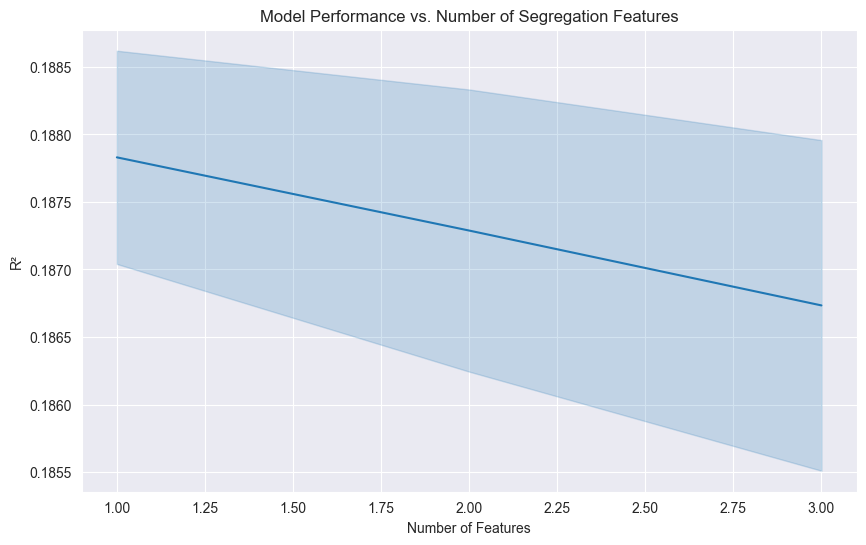

Best feature set: segregation[3.0],segregation[7.0],segregation[13.0]
Best R²: 0.1898


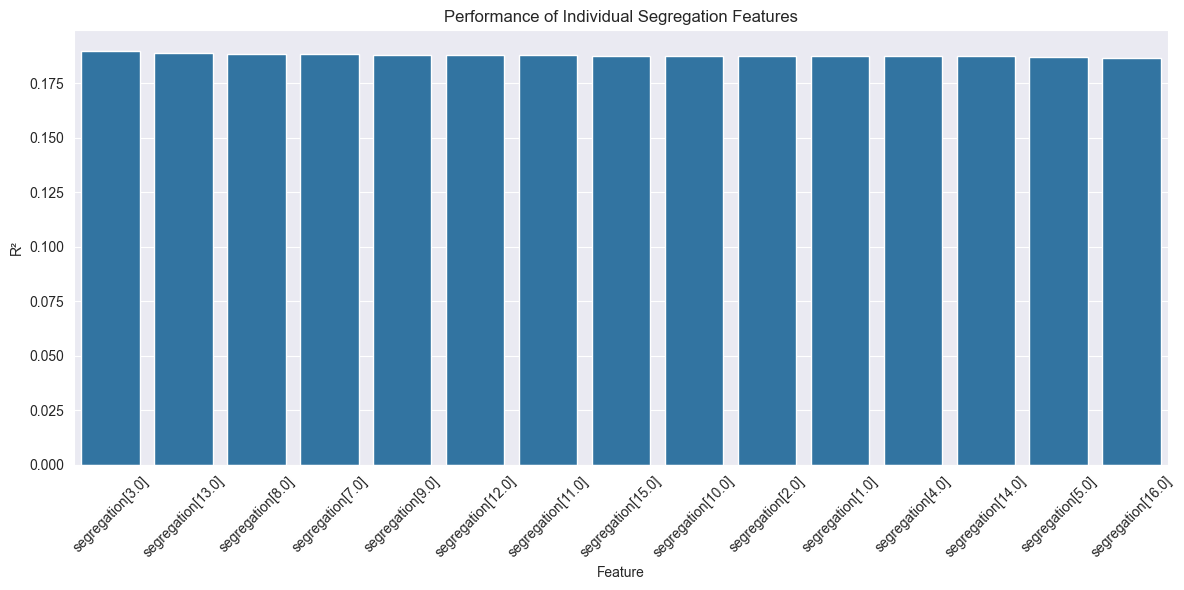

In [116]:
best_features = visualize_feature_selection_results(results_df)

In [118]:
best_segregation_set = segregation_baseline[['segregation[3.0]','segregation[7.0]','segregation[13.0]']]

In [119]:
features_ses_segregation_baseline = combine_data(combined_baseline_2, best_segregation_set)
results_no_network, models_no_network = run_cross_validation(features_ses_segregation_baseline, y_baseline_2,
                                                             use_network=False)
print_cross_val_results(results_no_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.477
Partial eta squared: 0.190
R²: 0.190


In [122]:
# Test 1: Observations + SES vs Observations + SES + Segregation best set
test1 = f_test_r2(
    r2_reduced=0.188,
    r2_full=0.190,
    n=combined_baseline_2.shape[0],
    p_reduced=combined_baseline_2.shape[1] - 1,
    p_full=combined_baseline_2.shape[1] + 2,
)
print(f"Test 1 (Obs vs Obs+SES): F={test1['f_statistic']:.4f}, p={test1['p_value']:.4e}")
if test1['p_value'] < 0.05:
    print(f"The full model provides a statistically significant improvement over the reduced model.")
else:
    print("There is not enough evidence")

Test 1 (Obs vs Obs+SES): F=2.0255, p=1.0824e-01
There is not enough evidence


In [123]:
segregation_followup = compute_one_statistic(
    df_features=features_1_aligned,
    df_network=networks_aligned_followup_df,
    community_sizes=community_sizes,
    net_order=net_order,
    mode="segregation",
    stat_name="segregation"
)

100%|██████████| 2478/2478 [01:09<00:00, 35.90it/s]


In [124]:
features_ses_segregation_followup = combine_data(combined_followup_2, segregation_followup)
results_no_network, models_no_network = run_cross_validation(features_ses_segregation_followup, y_followup_2,
                                                             use_network=False)
print_cross_val_results(results_no_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.443
Partial eta squared: 0.162
R²: 0.162


In [125]:
results_df = evaluate_feature_subsets(combined_followup_2, y_followup_2, segregation_followup, max_features=3)

Testing individual features...


100%|██████████| 15/15 [00:00<00:00, 20.20it/s]


Testing feature combinations...


105it [00:05, 20.21it/s]
455it [00:23, 19.36it/s]


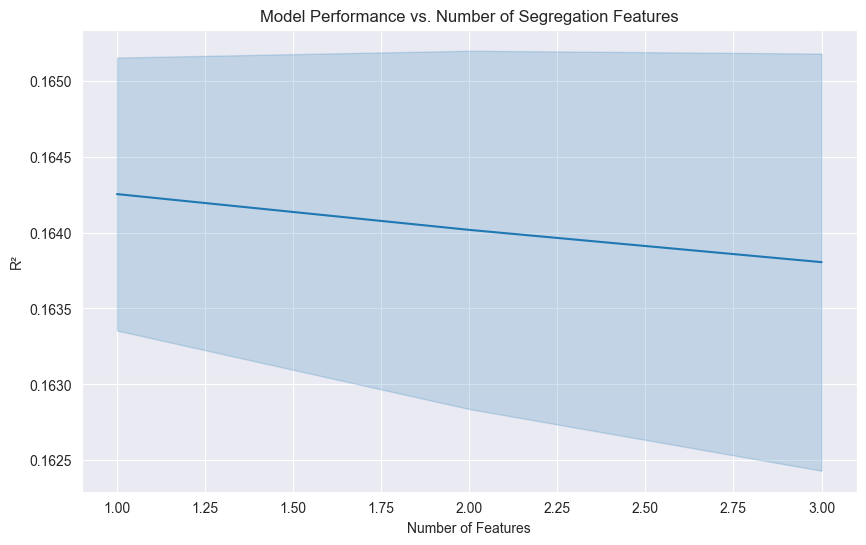

Best feature set: segregation[3.0],segregation[10.0],segregation[11.0]
Best R²: 0.1677


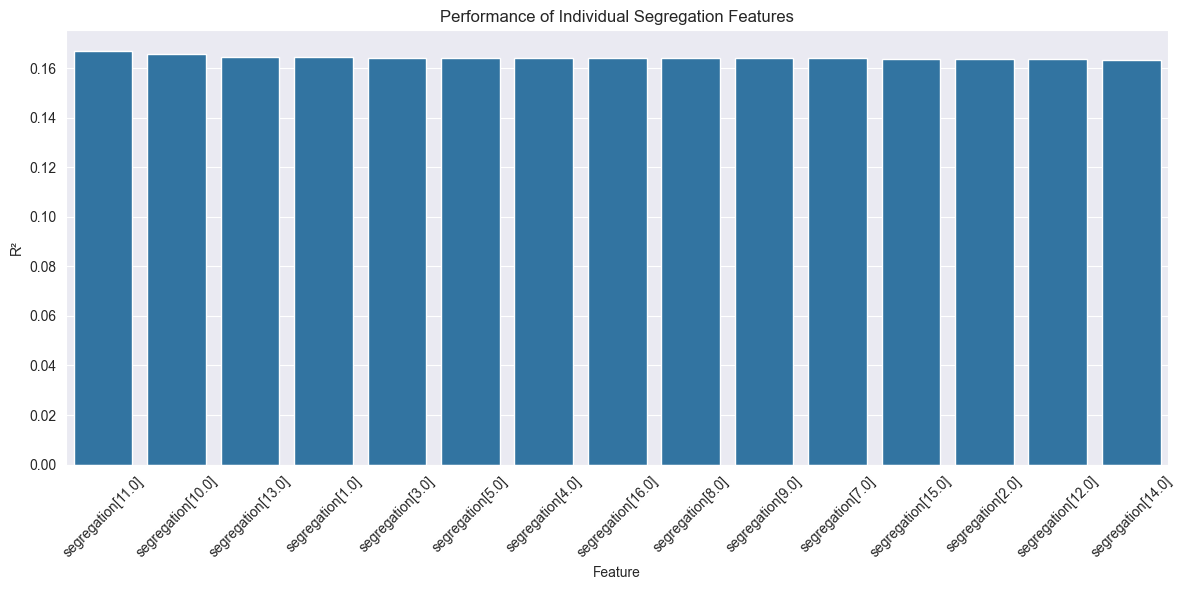

features        segregation[3.0],segregation[10.0],segregation...
num_features                                                    3
pearson_r                                                0.447961
r2                                                       0.167662
mse                                                      0.467685
Name: 334, dtype: object

In [126]:
visualize_feature_selection_results(results_df)

In [129]:
best_segregation_set = segregation_followup[['segregation[3.0]', 'segregation[10.0]', 'segregation[11.0]']]

In [130]:
features_ses_segregation_followup = combine_data(combined_followup_2, best_segregation_set)
results_no_network, models_no_network = run_cross_validation(features_ses_segregation_followup, y_followup_2,
                                                             use_network=False)
print_cross_val_results(results_no_network)

Cross-validated Performance Metrics:
Average Pearson's r: 0.448
Partial eta squared: 0.168
R²: 0.168
